In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [5]:
pwd

'C:\\Users\\LENOVO1'

In [6]:
cd Documents

C:\Users\LENOVO1\Documents


In [7]:
cd sem5

C:\Users\LENOVO1\Documents\sem5


In [8]:
cd MP-2

C:\Users\LENOVO1\Documents\sem5\MP-2


In [30]:
data = pd.read_csv('ReturnUpdatedCopy.csv')

In [31]:
data.head()

,biblionumber,Call,Branch,Collection
0,100094,6.3,ITFCA,GEN
1,26164,668.4,MMCC,REF
2,92589,153.9,BEC,GEN
3,91115,629.8,BEE,GEN
4,110805,629.8,BEE,GEN


In [59]:
number = LabelEncoder()
data['Collection'] = number.fit_transform(data['Collection'].astype('str'))
data['Branch'] = number.fit_transform(data['Branch'].astype('str'))
data['Branch'] = number.fit_transform(data['Branch'].astype('str'))

In [60]:
data.head()

,biblionumber,Call,Branch,Collection
0,100094,96,46,0
1,26164,153,42,1
2,92589,9,27,0
3,91115,139,29,0
4,110805,139,29,0


In [61]:
data.describe()

,biblionumber,Call,Branch,Collection
count,2557.000000,2557.000000,2557.000000,2557.000000
mean,59987.453266,102.888150,27.538522,0.063355
std,33854.229869,41.597736,9.805093,0.256173
min,11094.000000,0.000000,0.000000,0.000000
25%,31635.000000,64.000000,27.000000,0.000000
50%,40596.000000,113.000000,29.000000,0.000000
75%,99582.000000,123.000000,32.000000,0.000000
max,114369.000000,195.000000,48.000000,2.000000


In [43]:
data.dtypes

biblionumber     int64
Call            object
Branch           int32
Collection       int32
dtype: object

In [107]:
pd.isnull(data).sum()

biblionumber    0
Call            0
Branch          0
Collection      0
dtype: int64

In [180]:
kmeans = KMeans(n_clusters = 60)

In [181]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=60, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [182]:
pred = kmeans.predict(data)

In [183]:
pred

array([39, 49, 13, ..., 39, 16, 17])

In [184]:
pd.Series(pred).value_counts()

5     161
20     93
6      86
32     85
4      81
39     79
56     75
40     72
16     60
27     60
18     60
1      58
24     58
45     57
53     57
13     54
10     54
14     51
36     50
15     49
2      48
11     47
0      47
46     46
47     45
25     45
7      44
41     44
44     43
3      42
33     42
30     41
50     39
38     38
58     38
59     37
55     37
29     36
35     34
54     32
17     29
28     29
43     29
34     28
21     27
37     27
8      26
49     25
51     24
42     18
48     16
57     16
22     11
26     11
9      10
23      2
31      1
12      1
52      1
19      1
dtype: int64

In [185]:
kmeans.inertia_

104874462.59425785

In [186]:
kmeans.score(data)

-104874462.59485817

In [187]:
SSE = []

In [188]:
for cluster in range(10,200):
    kmeans = KMeans(n_jobs = -1,n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

In [189]:
frame = pd.DataFrame({'Cluster':range(10,200),'SSE':SSE})
frame.head()

,Cluster,SSE
0,10,4.975343e+09
1,11,4.352218e+09
2,12,3.705512e+09
3,13,3.061791e+09
4,14,2.556411e+09


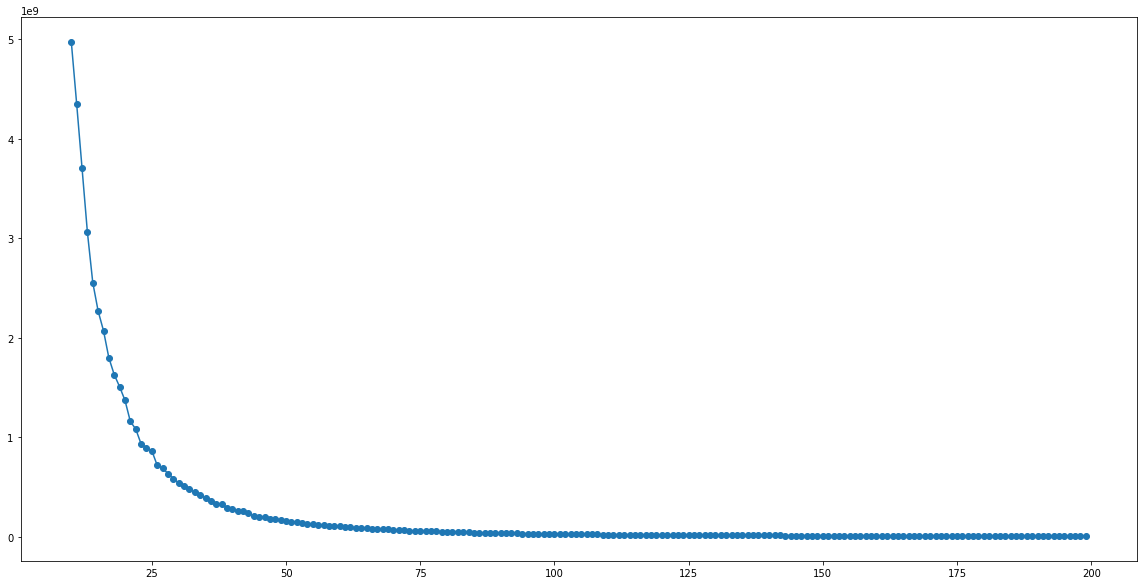

In [190]:
plt.figure(figsize=(20,10))
plt.plot(frame['Cluster'],frame['SSE'],marker="o")